# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to scrape reviews from IMDb
def scrape_reviews(url, num_reviews=100):
    reviews = []
    page_num = 1
    while len(reviews) < num_reviews:
        page_url = f"{url}&start={page_num}"
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        review_divs = soup.find_all('div', class_='text show-more__control')
        for review_div in review_divs:
            reviews.append(review_div.get_text(strip=True))
            if len(reviews) >= num_reviews:
                break
        page_num += 25  # IMDb shows 25 reviews per page
    return reviews[:num_reviews]

# Function to tokenize text into words
def tokenize_text(text):
    return word_tokenize(text)

# Function to generate N-grams
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

# Function to count frequency of N-grams
def count_ngrams(ngrams):
    return Counter(ngrams)

# Function to calculate probabilities for bigrams
def calculate_bigram_probabilities(tokens):
    bigrams = generate_ngrams(tokens, 2)
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(tokens)
    probabilities = {}
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        probabilities[bigram] = count / unigram_counts[w1]
    return probabilities

# Function to extract noun phrases
def extract_noun_phrases(text):
    tagged_text = pos_tag(word_tokenize(text))
    grammar = r"""
        NBAR:
            {<NN.*|JJ>*<NN.*>}  # Nouns and adjectives, terminated with nouns

        NP:
            {<NBAR>}
            {<NBAR><IN><NBAR>}  # Above, followed by preposition and noun
    """
    chunk_parser = nltk.RegexpParser(grammar)
    tree = chunk_parser.parse(tagged_text)
    noun_phrases = []
    for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
        noun_phrases.append(' '.join(word for word, pos in subtree.leaves()))
    return noun_phrases

# IMDb URL
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Scrape 100 reviews
reviews = scrape_reviews(url, num_reviews=100)

# Tokenize and preprocess reviews
all_tokens = []
for review in reviews:
    review_tokens = tokenize_text(review.lower())  # Convert to lowercase
    all_tokens.extend(review_tokens)

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(all_tokens)

# Count frequencies of all trigrams
trigrams = generate_ngrams(all_tokens, 3)
trigram_counts = count_ngrams(trigrams)

# Extract and calculate frequencies of noun phrases
all_noun_phrases = []
for review in reviews:
    noun_phrases = extract_noun_phrases(review)
    all_noun_phrases.extend(noun_phrases)
noun_phrase_counts = Counter(all_noun_phrases)

# Calculate relative probabilities of each review in terms of other reviews
max_freq_noun_phrase = max(noun_phrase_counts.values())
relative_probabilities = {}
for i, review in enumerate(reviews):
    review_noun_phrases = extract_noun_phrases(review)
    review_max_freq = max([noun_phrase_counts[np] for np in review_noun_phrases])
    relative_probabilities[i+1] = {np: noun_phrase_counts[np] / max_freq_noun_phrase for np in review_noun_phrases}

# Print results
print("Bigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob}")

print("\nTrigram Frequencies:")
for trigram, freq in trigram_counts.items():
    print(f"{trigram}: {freq}")

print("\nRelative Probabilities of Noun Phrases:")
for i, rp in relative_probabilities.items():
    print(f"Review {i}: {rp}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Streaming output truncated to the last 5000 lines.
('piece', 'of', 'white'): 4
('of', 'white', 'pastel'): 4
('white', 'pastel', 'to'): 4
('pastel', 'to', 'draw'): 4
('to', 'draw', 'a'): 4
('draw', 'a', 'diagram'): 4
('a', 'diagram', 'of'): 4
('diagram', 'of', 'them'): 4
('of', 'them', '.'): 4
('them', '.', 'film'): 4
('.', 'film', 'is'): 4
('is', 'a', 'visual'): 4
('a', 'visual', 'medium.consider'): 4
('visual', 'medium.consider', '``'): 4
('medium.consider', '``', 'schindler'): 4
('``', 'schindler', "'s"): 4
('schindler', "'s", 'list'): 8
("'s", 'list', "''"): 4
('list', "''", '('): 4
("''", '(', 'or'): 4
('(', 'or', 'any'): 4
('or', 'any', 'spielberg'): 4
('any', 'spielberg', 'movie'): 4
('spielberg', 'movie', ','): 4
('movie', ',', 'really'): 4
(',', 'really', ')'): 4
('really', ')', ','): 4
(')', ',', 'and'): 4
(',', 'and', 'observe'): 4
('and', 'observe', 'the'): 4
('observe', 'the', 'blocking'): 4
('the', 'blocking', 'of'): 8
('blocking', 'of', 'the'): 8
('of', 'the', 'actors'): 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import math

# Function to scrape reviews from IMDb
def scrape_reviews(url):
    reviews = []
    page_num = 1
    while len(reviews) < 100:
        page_url = f"{url}&start={page_num}"
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        review_divs = soup.find_all('div', class_='text show-more__control')
        for review_div in review_divs:
            reviews.append(review_div.get_text(strip=True))
            if len(reviews) >= 100:
                break
        page_num += 25  # IMDb shows 25 reviews per page
    return reviews

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().split()  # Convert to lowercase and split into words

# Function to calculate term frequency (TF)
def calculate_tf(document):
    term_frequency = {}
    for term in document:
        term_frequency[term] = term_frequency.get(term, 0) + 1
    return term_frequency

# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents, term_frequency):
    document_count = len(documents)
    inverse_document_frequency = {}
    for term in term_frequency:
        term_in_documents = sum(1 for document in documents if term in document)
        inverse_document_frequency[term] = math.log(document_count / (1 + term_in_documents))
    return inverse_document_frequency

# Function to calculate TF-IDF matrix
def calculate_tf_idf_matrix(documents):
    term_frequency_list = [calculate_tf(preprocess_text(document)) for document in documents]
    terms = set().union(*term_frequency_list)
    inverse_document_frequency = calculate_idf(documents, terms)

    tf_idf_matrix = []
    for term_frequency in term_frequency_list:
        tf_idf_vector = {}
        for term, frequency in term_frequency.items():
            tf_idf_vector[term] = frequency * inverse_document_frequency[term]
        tf_idf_matrix.append(tf_idf_vector)

    return tf_idf_matrix, inverse_document_frequency

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1.get(term, 0) * vector2.get(term, 0) for term in set(vector1) & set(vector2))
    magnitude1 = math.sqrt(sum(value**2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value**2 for value in vector2.values()))
    return dot_product / (magnitude1 * magnitude2)

# IMDb URL
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Scrape 100 reviews
reviews = scrape_reviews(url)

# Calculate TF-IDF matrix for documents and inverse document frequency
tf_idf_matrix, inverse_document_frequency = calculate_tf_idf_matrix(reviews)

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Preprocess query
query_terms = preprocess_text(query)

# Calculate TF-IDF representation of query
query_tf = calculate_tf(query_terms)
query_tf_idf = {term: tf * inverse_document_frequency[term] for term, tf in query_tf.items()}

# Calculate cosine similarity between query and documents
cosine_similarities = []
for tf_idf_vector in tf_idf_matrix:
    cosine_similarities.append(cosine_similarity(query_tf_idf, tf_idf_vector))

# Rank documents based on cosine similarity
ranked_documents = sorted(zip(cosine_similarities, reviews), reverse=True)

# Print ranked documents
for rank, (similarity, document) in enumerate(ranked_documents, 1):
    print(f"Rank {rank}: Similarity = {similarity:.4f}, Document = {document}")


Rank 1: Similarity = 0.0686, Document = At its core Oppenheimer is a technical masterpiece. The haunting score by Ludwig Göransson is one of the film's most profound highlights. The score acts as its own character in how it builds and arcs throughout the film and peaks during arguably the best moment, the bomb drop. Paired with an aggressive and bold sound design that transports you into the screen, both sound aspects make this film truly remarkable.There are no faults in the incredible acting of the monumental cast in Oppenheimer. Murphy plays Oppenheimer in a way that enables the audience to feel the gravity of his situation and the historical repercussions that follow. However, Robert Downey Jr., who plays Lewis Strauss, is arguably the best the Oppenheimer cast brings. Downey Jr perfectly portrays the slow spiral and eventual downfall of his character.The film shines when it shifts into a more psychological element focusing on Oppenheimer and the impact of his actions and their eff

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

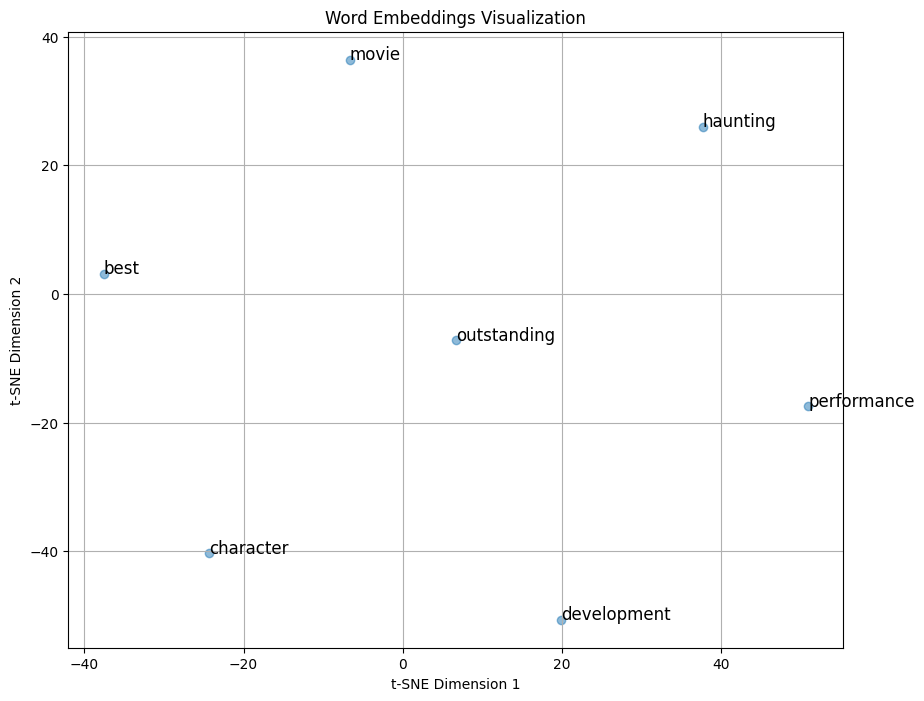

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to scrape reviews from IMDb
def scrape_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('div', class_='text show-more__control')
    return [review.get_text(strip=True) for review in reviews]

# IMDb URL
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Scrape reviews
reviews = scrape_reviews(url)

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().split()  # Convert to lowercase and split into words

# Tokenize and preprocess reviews
tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Function to visualize word embeddings
def visualize_embeddings(model, words):
    word_vectors = []
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
    word_vectors = np.array(word_vectors)

    # Dimensionality reduction using t-SNE
    perplexity = min(30, len(word_vectors) - 1)  # Set perplexity to a reasonable value
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    word_vectors_tsne = tsne.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='o', alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=12)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()

# Example words to visualize
words_to_visualize = ['movie', 'performance', 'character', 'development', 'outstanding', 'haunting', 'best']

# Visualize word embeddings
visualize_embeddings(model, words_to_visualize)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Namratha-Reddy-15/Namratha_Reddy_INFO-5731/blob/main/movie_reviews_with_sentiment%20.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
#Implementing n-gram analysis, TF-IDF calculation from scratch is difficult. It is difficlt to implement these algorithms correctly and efficiently without using pre-existing libraries. Even though it is difficult,it provides valuable hands-on experience and a good understanding of how these techniques work.
#Annotating each review with sentiment lables like positive, neagtive and neutral invovles manual effort.It is time consuming.
